# 2. 3. 3 선형모델

### Wave 데이터셋
* 파라미터 학습

In [7]:
import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

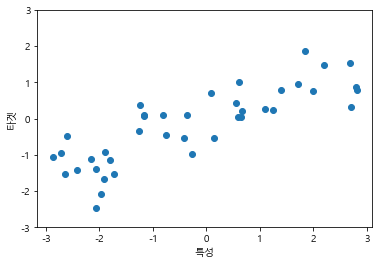

In [8]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

#데이터셋 가져오기
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")
plt.show()

w[0]: 0.393906  b: -0.031804


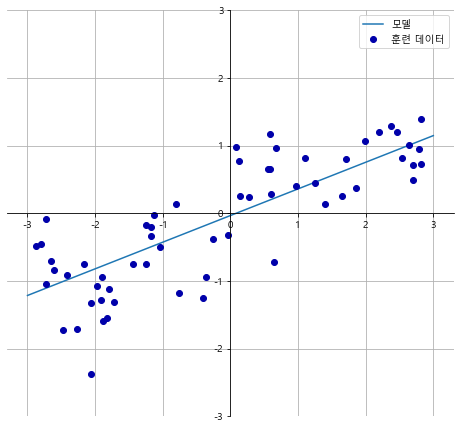

In [9]:
#만약 특성이 1개인 데이터 셋이면 y=w[0]*x[0]+b로 나타내어진다
#특성이많아지면 w는 각 특성에 해당하는 기울기를 가진다
mglearn.plots.plot_linear_regression_wave()

## 1)선형회귀(최소제곱법)

In [12]:
from sklearn.linear_model import LinearRegression #LinearRegression 선형회귀
from sklearn.model_selection import train_test_split #데이터 섞음
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [14]:
print("lr.coef_:", lr.coef_) #기울기(W) coef_속성에 저장됨
print("lr.intercept_:", lr.intercept_) #편향/절편(b) intercept_ 속성에 저장됨

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [19]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


* 과소적합 (둘다 점수가 낮음)

### Linear Regression(선형회귀)모델-보스턴 주택가격(복잡한 데이터셋)

In [21]:
from sklearn.datasets import load_boston
bostion = load_boston()
print("데이터의 형태:", bostion.data.shape)

데이터의 형태: (506, 13)


In [23]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [24]:
### 선형 회귀 모델로 성능 확인
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
print("훈련 세트 점수 : {:.2f}". format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


* 훈련세트 점수:0.95
* 테스트 세트 점수:0.61
* 훈련 데이터와 테스트 데이터 사이에 성능 차이가 크다. 훈련 세트에 과대적합 오버핏

## 2)릿지 회귀

In [31]:
from sklearn.linear_model import Ridge #모델만 바뀌었어

ridge = Ridge().fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련세트점수: 0.89
테스트 세트점수: 0.75


* 훈련세트 정확도 떨어지고, 테스트 세트 정확도 올라감

#### LinearRegression에 비해 훈련 세트에서는 점수가 낮지만 테스트 세트에 대한 점수는 더 높다
#### 선형 회귀는 이 데이터셋에서 과대적합되지만 릿지는 덜 자유로운 모델이기에 과대적합이 적어진다
#### 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다.
#### 우리가 관심있는 것은 훈련 세트가 아닌 테스트 세트이므로 Ridge모델을 선택해야 한다.

In [45]:
<img src = 'model_fit.png'>

SyntaxError: invalid syntax (Temp/ipykernel_10036/481121482.py, line 1)

#### Ridge는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를 절충할수 있는 방법을 제공
#### alpha매개변수 값을 바꿔서 확인해보자


In [37]:
print("훈련세트점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련세트점수: 0.89
테스트 세트점수: 0.75


In [39]:
#alpha매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할수 있다(기본값 alpha=1.0)
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만
# 일반화에 쉬워진다
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련세트점수: 0.79
테스트 세트점수: 0.64


* 훈련세트, 테스트 세트 낮아짐(알파값 늘림으로)

In [40]:
# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 
# LinearRegression(0.95, 0.61)으로 만든 모델과 거의 같아짐
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련세트점수: 0.93
테스트 세트점수: 0.77


* 훈련 세트, 테스트 세트 높아짐(알파값 줄임으로)

#### alpha값에 따른 coef 속성의 변화 확인하기
* alpha값에 다른 coef속성(w)의 변화를 그래프로 확인해보자
* alpha매개변수가 모델을 어덯게 변경시키는지 이해할수 있다.
* alpha값이 높으면 제약이 많으므로 작은 값일때보다 절대값의 크기가 작을 것이다.(일반화가 쉬워지므로)

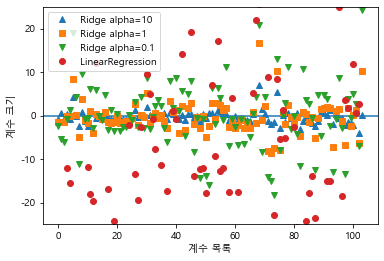

In [41]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()

#### 위 그림은 선형회귀, 릿지회귀의 알파값에 따른 그래프를 확인할수 있다
#### 알파 값이 커질수록 0에 가까워짐을 확인할수 있다 -> score는 낮아지지만 일반화되어진다

#### 데이터 셋 의 크기에 따른 모델의 성능 변화 확인하기
#### 학습곡선 : 데이터셋의 샘플링에 따른 모델의 성능변화 그래프

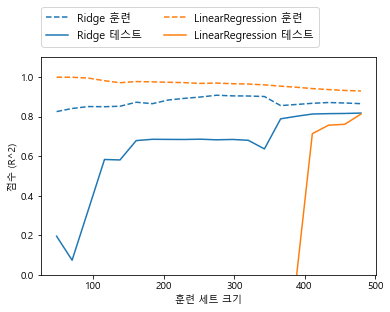

In [43]:
mglearn.plots.plot_ridge_n_samples()

#### 위 그림을 보면 모든 데이터셋에 대해 릿지와 선형회귀 모두 훈련세트의 점수가 테스트 세트 점수보다 높다
* 릿지 회귀에는 규제가 적용되므로 릿지의 훈련데이터 점수가 전체적으로 선형회귀의 훈련데이터점수보다 낮다
* 그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.
* 두 모델의 성능은 데이터가 많아질수록 좁아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다
* => 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.


## 3)라쏘(Lasso)

#### 선형 회귀에 규제를 적용하는데 릿지의 대안으로 라쏘가 있다.
#### 릿지 회귀에서와 같이 라쏘도 게수를 0에 가깝게 만들려고 한다. 이를 L1규제라고 한다.
#### L1규제를 하면 어떤 계수는 정말 0이 된다. 따라서 모델에서 완전히 제외되는 특성이 생긴다는 뜻이다.
#### 보스턴 주택가격 데이터셋에 라쏘를 적용해보자

In [53]:
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


* lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다.
* 이는 과소적합이며, 104개의 특성중 4개만 사용한 것을 알수 있다.

In [55]:
# max_iter 기본 값을 증가시키지 않으면 max_iter값을 늘이라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [56]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


* alpha값을 작게 할수록 사용한 특성의 수를 보면 4 -> 33 ->94개로 증가한것을 보면 된다.
* alpha값을 낮추면 규제의 효과가 없어져 과대적합(훈련셋에 오버핏되는 것)이 되므로 LinearRegression의 결과와 비슷해진다.

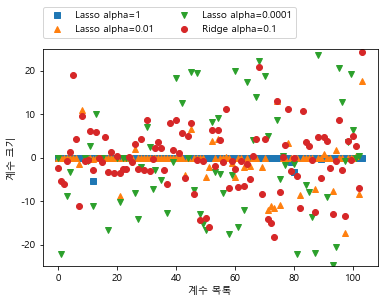

In [58]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()

* alpha=1일때 계수 대부분이 0일뿐만 아니라 나머지 계수들도 크기가 작다는 것을 알수 있다.
* alpha=0.001로 줄이면 대부분의 특성이 0이 되는 분포를 얻게 된다.
* alpha=0.0001로 줄이면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 된다.
* Ridge모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.--> 실제로 이 두 모델중 보통은 릿지 회귀를 선호한다.(100퍼센트는 아니다)
* 하지만 특성이 많고 그 중 일부분만 중요하다면 lasso가 더 좋은 선택일수 있다.
* scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다.
* 실제로 이 조합은 최상의 성능을 내지만 L1규제와 L2규제를 위한 매개변수 두개를 조정해야 한다.

## 4) 분류용 선형 모델 (p.86) - 회귀아님, 분류알고리즘

### 1.forge데이터 셋을 이용하여 결정 경계를 그림으로 나타내보자

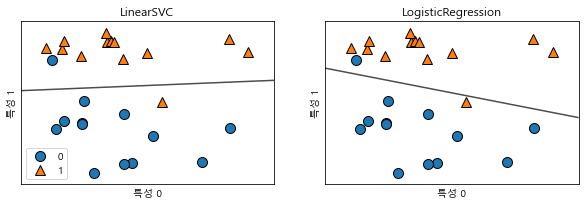

In [65]:
#p.87분류 알고리즘(LiearRegression과 구분해)
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC #svc 선형 나타냄

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf. __class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

* 첫번째 특성을 X축에 놓고 두번째 특성을 y축에 놓았다
* 위쪽은 클래스1, 아래쪽은 클래스 0으로 나누고 있다
* 이 두 모델은 회귀에서 본 Ridge와 같이 L2 규제를 사용한다
* LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다
* C의 값이 놓아지면 규제가 감소하고 계수벡터(w)가 0에 가까워지며, C의 값을 높게하면 훈련세트에 가능한 맞춘다. 

### 2.LinearSVC에 C의 변화를 주어보자

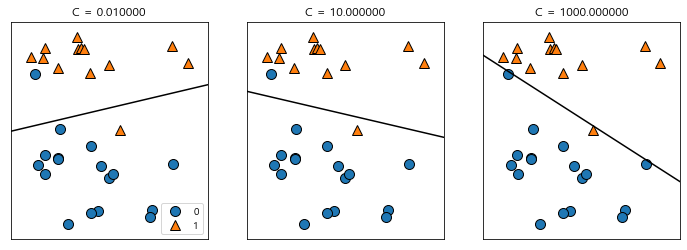

In [67]:
mglearn.plots.plot_linear_svc_regularization()

* 첫번째 그림은 아주 작은 c값으로 규제가 많이 적용되었다.
* 규제가 많이 적용된 모델은 비교적 수평에 가까운 결정 경계를 만들었고, 잘못 분류된 데이터는 2개이다.
* 두번째 그림은 c값이 조금 더 크며, 잘못 분류한 두 데이터에 민감해져 결정 경계가 기울어졌다.
* 세번째 그림은 c값을 아주 크게 하여, 결정 경계는 크게 기울고, 1개만 잘 못 분류되었다.
* 전체를 정확하게 분류하려 했지만 전체적인 배치를 잘 파악하지 못한 결과이다 =>과대적합
* 회귀와 비슷하게 분류에서의 선형모델은 낮은 차원의 데이터에서는 결정경계가 직선이거나 평면이어서 매우 제한적으로 보인다.
* 하지만 고차원에서는 분류에 대한 선형모델이 강해지며, 특성이 많아지면 과대적합되지 않도록 해야한다.

### 선형 분류 알고리즘

* linear_model.LogisticRegression에 구현된 로지스틱 회귀
* svm.LinearSVC에 구현된 선형 서포트 벡터 머신
* 두개중에 LogisticRegression에 대하여 알아보자
* 유방함 데이터셋을 이용

### 1. 데이터적재 및 확인하기

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련세트점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트세트점수 : {:.3f}".format(logreg.score(X_test, y_test)))
#과소적합

훈련세트점수 : 0.958
테스트세트점수 : 0.958


In [70]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련세트점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트세트점수 : {:.3f}".format(logreg100.score(X_test, y_test)))
#훈련, 테스트 세트의 정확도 조금 증가

훈련세트점수 : 0.984
테스트세트점수 : 0.965


In [71]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련세트점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트세트점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련세트점수 : 0.953
테스트세트점수 : 0.951


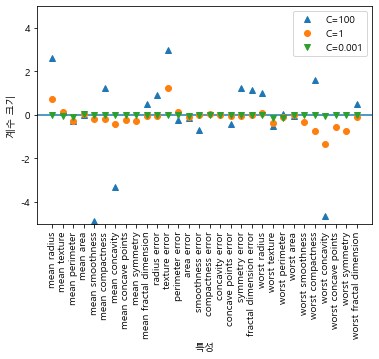

In [74]:
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

* 더 이해하기 쉬운 모델을 원한다면 L1규제 사용하는 것이 좋다.
* penalty 매개변수를 통해 L1규제를 사용할수 있다.
* 다음은 L1규제를 사용할때의 분류 정확도와 계수 그래프이다.

#### L1규제를 사용하여 각기 다른 C값을 적용한 로지스틱 회귀 모델의 계수

C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


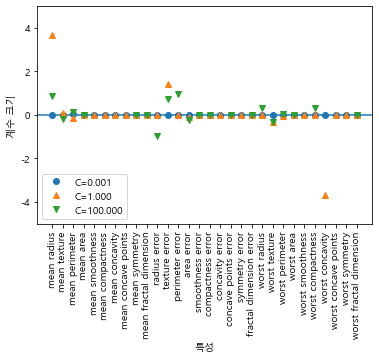

In [80]:
#solver : 최적화 알고리즘, max_ite:최대 반복 횟수 값
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver = 'liblinear', C=C,
                              penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5,5)
plt.legend(loc=3)
plt.show()

* 이와 같이 이진분류-선형모델과 회귀 선형모델간에는 유사점이 많다.
* 중요한 점은 규제에서 모든 특성을 사용할지 (L2규제)일부 특성만 사용할지(L1)인지 결정하는 penalty매개변수가 차이읻.

## 5)다중 클래스 분류를 위한 선형 모델
* 세개의 클래스를 가진 데이터셋에 일대다 방식을 적용해보자.(ex)아이리스데이터)

In [4]:
import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 1. 데이터 적재 및 확인하기

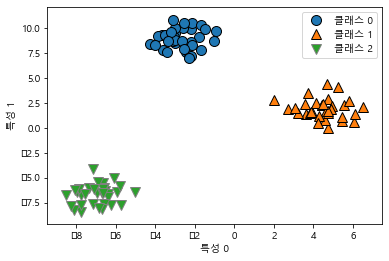

In [6]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

#데이터 셋 가져오기
#3개의 클래스 2차원 데이터, 각 클래스의 데이터는 정규분포를 따른다
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show()

In [7]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)
#행 : 3개의 클래스에 각각 대응하는 계수 벡터를 담고 있다.
#열 : 각 특성에 따른 계수값 2개를 담고 있다
#intercept는 각 클래스의 절편을 담은 1차원 벡터이다.

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


### 3.세개의 이진 분류기가 만드는 경계를 그려보기

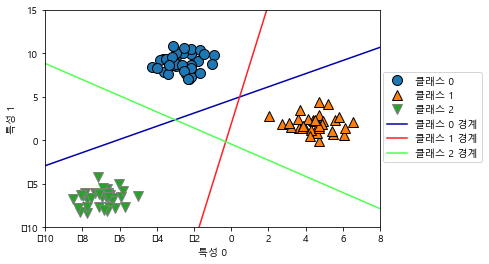

In [9]:
#3개의 1:N 분류기가 만든 결정 경계
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01, 0.3))
plt.show()
#세 개의 일대 다 분류기로 만든 결정 경계

### 4. 세 대의 일대 다 분류기의 다중 클래스 결정 경계 

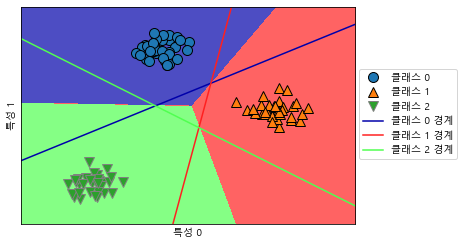

In [10]:
# 3개의 1:N 분류기가 만든 결정 경계(선형분류기로 분류)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

#### 선형 모델 정리
* 선형 모델의 주요 매개변수는
* 회귀모델에서는 알파였고, LinearSVC와 LogisticRegression에서는 C였다
* alpha값이 클수록 C값이 작을수록 모델이 단순해진다
* 보통 C와  alpha는 로그스케일로 최적치를 정한다(1->0.01,10,10000)
* 그리고 L1규제를 사용할지 L2규제를 사용할지 정해야 한다.(보통 회귀는 릿지(L2)를 많이 쓴다)
* 중요한 특징 많지 않으면 L1사용하고, 그렇지 않으면 기본적으로 L2를 사용한다
* L1규제는 몇가지 특성만 사용하므로 모델에 중요한 특성이 무엇이고 효과가 어느정도이지 설명하기 쉽다.
* 선형 모델은 학습 속도가 빠르고 예측이 빠르다. 또한 다른 모델에 비해 이해하기 쉽다.

# 2.3.4 나이브 베이즈 분류기

In [21]:
X = np.array([[0, 1, 0, 1], #0
             [1, 0, 1, 1],  #1
             [0, 0, 0, 1],  #0
             [1, 0, 1, 0]]) #1
y = np.array([0, 1, 0, 1])

In [24]:
counts = {}
for label in np.unique(y):
    print(label)
    #각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis=0)
    print(X[y == label])
print("특성 카운트:\n", counts)

0
[[0 1 0 1]
 [0 0 0 1]]
1
[[1 0 1 1]
 [1 0 1 0]]
특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
